# 퍼셉트론

## #01. 퍼셉트론의 이해

- 인공신경망의 기원이 되는 알고리즘
- 하나 이상의 신호를 입력받아 어떠한 계산을 수행한 후 하나의 ouput으로 출력하낟
- 퍼셉트론은 1과 0 의 신호만 가짐
- 신호가 흐르면 1, 흐르지 않으면 0이다.

### 1. input이 2개인 퍼셉트론
- x1과 x2는 입력신호, y는 출력신호, w1,w2는 가중치를 의미한다
- x와 가중치를 곱한값을 모두 더해서 하나의 y를 만듬
- 입력신호가 뉴런에 보내질때는 각각 고유한 가중치가 곱해지고 그 값들을 모두 더해서 나온 값이 어떠한 임계값을 넘을 떄만 1로 출력
- 신경망에서 만들어진 값을 적절한 출력값으로 변환해주는 함수를 활성화 함수
- 입력신호와 출력신호를 담고있는 원은 노드 or 뉴런이라고 부른다.

### 2. 논리회로

- 논리 연산을 통해 전기 장치를 제어하는 통로
- 컴퓨터 및 전기 장치의 기본 부품
- 불 대수를 이용하여 설계
- 여러개를 입력해도 하나의 출력값을 가짐

### 3. 게이트 
- 논리 회로의 기초 구성요소
- 각 게이트는 논리 연산 하나를 구현한다.


## #02. 퍼셉트론 구현하기

### 패키지 참조하기


In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse 
import pandas as pd



### 2. AND 게이트 
#### 1) 데이터셋 준비
##### 랜덤 시드값 고정

In [2]:
np.random.seed(777)

데이터 셋 구성

In [3]:
train_x = np.array([[0,0],[1,0],[0,1],[1,1]])
train_y = np.array([[0],[0],[0],[1]])


#### 3) e데이터 전처리 
-> 안해도 됌

#### 4) 탐색적 데이터 분석


In [4]:
label = train_y.flatten()
df=pd.DataFrame(train_x,index = label,columns=['x1','x2'])
df.index.name = 'y'
df

,x1,x2
y,,
0,0,0
0,1,0
0,0,1
1,1,1


#### 5) 데이터셋 분할 
분할 x 

#### 6) 모델 개발
모델정의

In [5]:
### input_shape은 2차원 임 
model = Sequential()
model.add(Dense(1,input_shape = (2,),activation='linear'))
model.compile(optimizer = SGD(),loss = mse, metrics = ['acc'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


학습하기

In [6]:
hist = model.fit(train_x,train_y,epochs=300)
result_df = pd.DataFrame(hist.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs',inplace=True)
result_df


Epoch 1/300


1/1 [==============================] - 1s 652ms/step - loss: 0.5494 - acc: 0.5000
Epoch 2/300
1/1 [==============================] - 0s 9ms/step - loss: 0.5353 - acc: 0.5000
Epoch 3/300
1/1 [==============================] - 0s 12ms/step - loss: 0.5219 - acc: 0.5000
Epoch 4/300
1/1 [==============================] - 0s 9ms/step - loss: 0.5092 - acc: 0.5000
Epoch 5/300
1/1 [==============================] - 0s 10ms/step - loss: 0.4972 - acc: 0.5000
Epoch 6/300
1/1 [==============================] - 0s 11ms/step - loss: 0.4858 - acc: 0.5000
Epoch 7/300
1/1 [==============================] - 0s 13ms/step - loss: 0.4750 - acc: 0.5000
Epoch 8/300
1/1 [==============================] - 0s 12ms/step - loss: 0.4647 - acc: 0.5000
Epoch 9/300
1/1 [==============================] - 0s 11ms/step - loss: 0.4549 - acc: 0.5000
Epoch 10/300
1/1 [==============================] - 0s 12ms/step - loss: 0.4456 - acc: 0.5000
Epoch 11/300
1/1 [==============================] - 0s 12ms/step - loss: 0.4367 - 

,loss,acc
epochs,,
1,0.549386,0.5
2,0.535270,0.5
3,0.521895,0.5
4,0.509217,0.5
5,0.497194,0.5
...,...,...
296,0.088620,1.0
297,0.088416,1.0
298,0.088215,1.0


#### 7) 학습결과 평가
평과결과 시각화

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


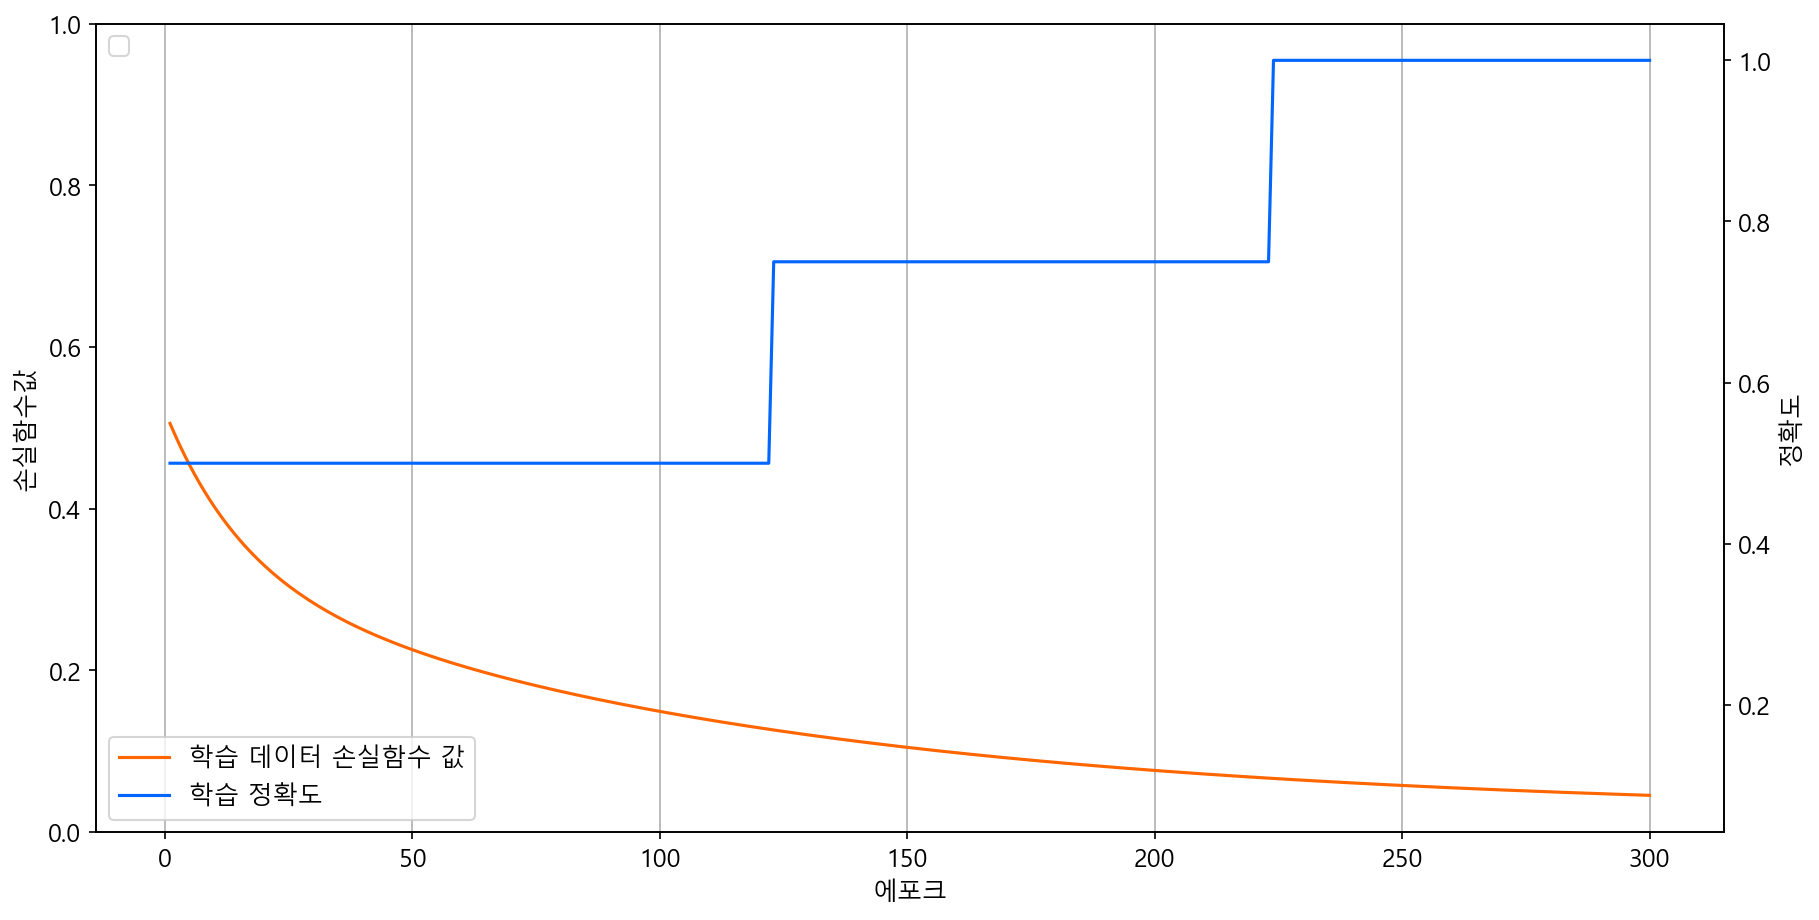

In [7]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12

fig, ax1 = plt.subplots(1, 1, figsize=(14, 7), dpi=150)
ax2 = ax1.twinx()

sns.lineplot(data=result_df,x=result_df.index,y='loss',color='#ff6600',label='학습 데이터 손실함수 값')
ax1.set_xlabel('에포크')
ax1.set_ylabel('손실함수값')
ax1.legend(loc='upper left')
ax1.grid(axis='x')

sns.lineplot(data=result_df,x=result_df.index,y='acc',color='#0066ff',label='학습 정확도')
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')

plt.show()
plt.close()

모델 성능평가

In [8]:
ev = model.evaluate(train_x,train_y)
print(f"손실함수값: {ev[0]}  정확도: {ev[1]}")

1/1 [==============================] - 2s 2s/step - loss: 0.0876 - acc: 1.0000
손실함수값: 0.08761952817440033  정확도: 1.0


가중치, 편향 확인

In [9]:
weight, bias = model.get_weights()
print("가중치: %s" % weight.flatten())
print("편향: %s" % bias.flatten())

가중치: [0.47536075 0.19015923]
편향: [-0.05165649]


#### 8) 학습결과적용
단일데이터에 대한 예측치 선정

In [10]:
r00 = model.predict([[0,0]])
r00

1/1 [==============================] - 1s 705ms/step


array([[-0.05165649]], dtype=float32)

In [11]:
r00[0,0]

-0.05165649

In [12]:
result = "%s OR %s => %s" % (bool(0), bool(0), bool(round(r00[0,0])))
result

'False OR False => False'

학습 데이터 전체를 활용하여 예측값 만들기

In [13]:
r= model.predict(train_x)
r

1/1 [==============================] - 0s 26ms/step


array([[-0.05165649],
       [ 0.42370427],
       [ 0.13850275],
       [ 0.61386347]], dtype=float32)

In [14]:
df['예측값'] = r.reshape(-1).round()
df

,x1,x2,예측값
y,,,
0,0,0,-0.0
0,1,0,0.0
0,0,1,0.0
1,1,1,1.0


### OR게이트 


#### 1) 데이터 셋 준비
##### 랜덤시드값 고정

In [15]:
np.random.seed(132)

##### 데이터 셋 구성

In [16]:
train_x = np.array([[0,0],[1,0],[0,1],[1,1]])
train_y = np.array([[0],[1],[1],[1]])


In [17]:
train_y

array([[0],
       [1],
       [1],
       [1]])

#### 3) 데이터 전처리 
-> 안해도 됌
#### 4) 탐색적 데이터 분석


In [20]:
label = train_y.flatten()
df = pd.DataFrame(train_x,index=label,columns=['x1','x2'])
df.index.name = 'y'
df

,x1,x2
y,,
0,0,0
1,1,0
1,0,1
1,1,1


#### 5) 데이터셋 분할
분할x
#### 6) 모델 개발
모델정의

In [21]:
model = Sequential()
model.add(Dense(1,input_shape=(2,),activation='linear'))
model.compile(optimizer=SGD(),loss=mse,metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


학습하기

In [22]:
hist = model.fit(train_x,train_y,epochs=400)
result_df = pd.DataFrame(hist.history)
result_df['epochs'] = result.index+1
result_df.set_index('epochs',inplace=True)
result.df

Epoch 1/400
1/1 [==============================] - 1s 811ms/step - loss: 0.4314 - acc: 0.2500
Epoch 2/400
1/1 [==============================] - 0s 14ms/step - loss: 0.4093 - acc: 0.2500
Epoch 3/400
1/1 [==============================] - 0s 13ms/step - loss: 0.3887 - acc: 0.2500
Epoch 4/400
1/1 [==============================] - 0s 18ms/step - loss: 0.3693 - acc: 0.2500
Epoch 5/400
1/1 [==============================] - 0s 17ms/step - loss: 0.3511 - acc: 0.2500
Epoch 6/400
1/1 [==============================] - 0s 16ms/step - loss: 0.3340 - acc: 0.5000
Epoch 7/400
1/1 [==============================] - 0s 14ms/step - loss: 0.3181 - acc: 0.5000
Epoch 8/400
1/1 [==============================] - 0s 14ms/step - loss: 0.3031 - acc: 0.5000
Epoch 9/400
1/1 [==============================] - 0s 12ms/step - loss: 0.2890 - acc: 0.5000
Epoch 10/400
1/1 [==============================] - 0s 9ms/step - loss: 0.2758 - acc: 0.7500
Epoch 11/400
1/1 [==============================] - 0s 8ms/step - los

TypeError: unsupported operand type(s) for +: 'builtin_function_or_method' and 'int'

In [26]:
result_df['epochs'] = result_df.index
result_df.set_index('epochs',inplace=True)
result_df

,loss,acc
epochs,,
2,0.431383,0.25
3,0.409337,0.25
4,0.388664,0.25
5,0.369277,0.25
6,0.351096,0.25
...,...,...
397,0.063174,1.00
398,0.063169,1.00
399,0.063164,1.00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


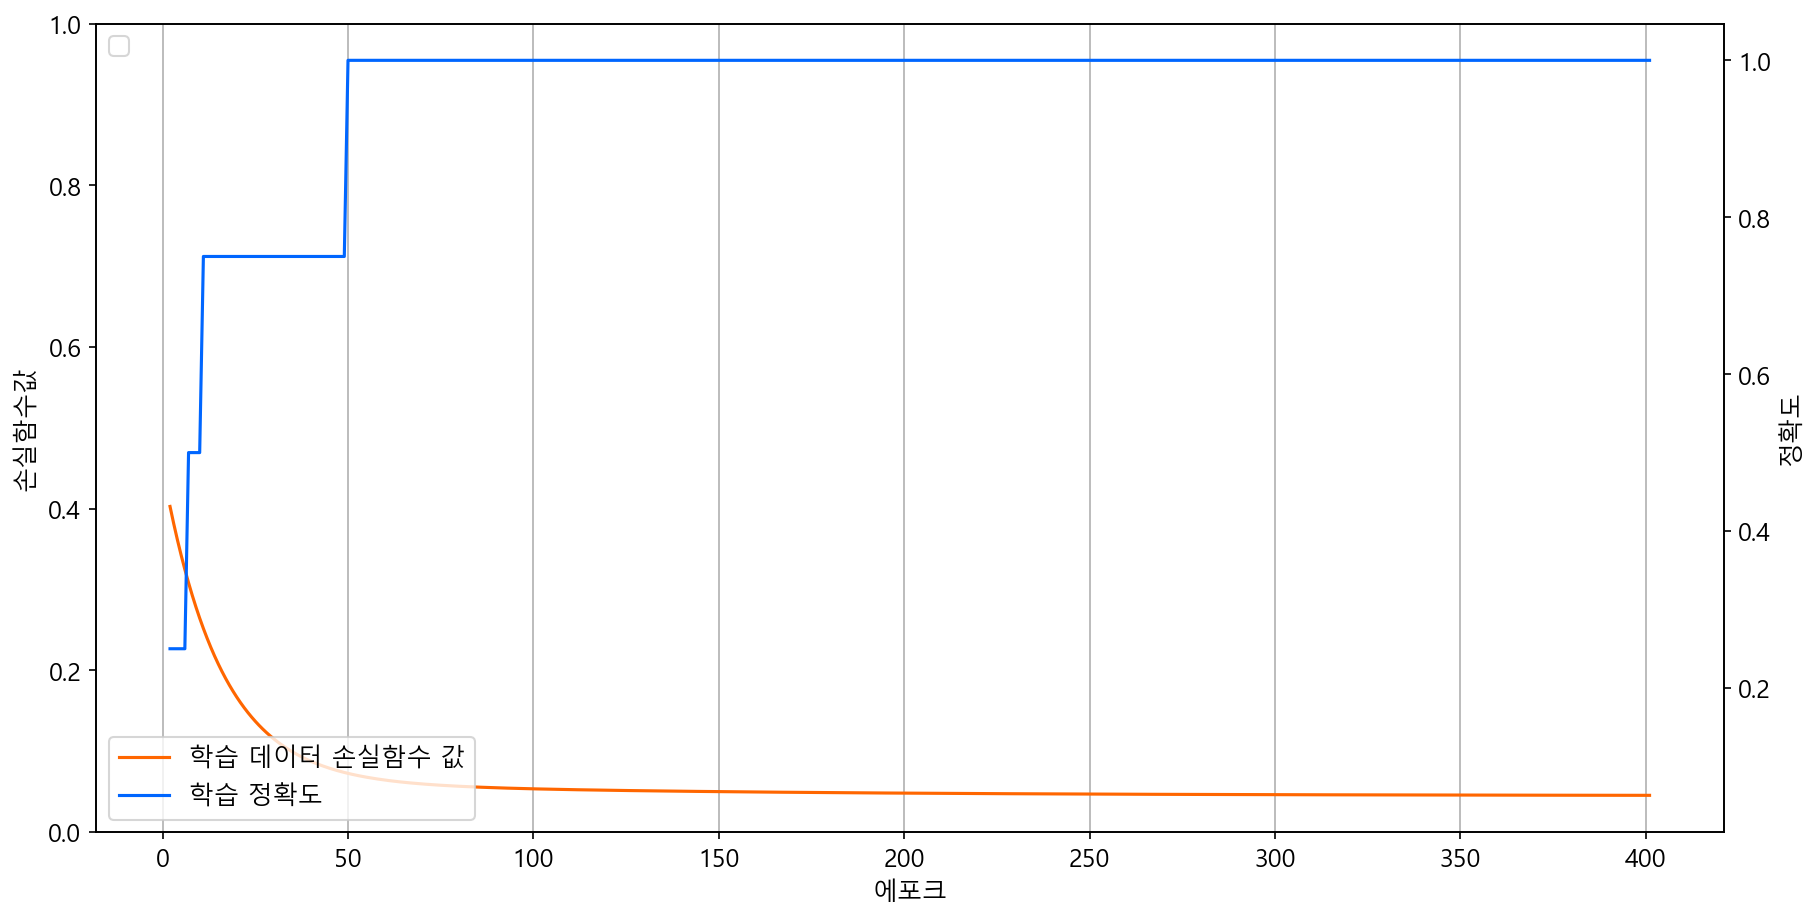

In [27]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12

fig, ax1 = plt.subplots(1, 1, figsize=(14, 7), dpi=150)
ax2 = ax1.twinx()

sns.lineplot(data=result_df,x=result_df.index,y='loss',color='#ff6600',label='학습 데이터 손실함수 값')
ax1.set_xlabel('에포크')
ax1.set_ylabel('손실함수값')
ax1.legend(loc='upper left')
ax1.grid(axis='x')

sns.lineplot(data=result_df,x=result_df.index,y='acc',color='#0066ff',label='학습 정확도')
ax2.set_ylabel('정확도')
ax2.legend(loc='lower left')

plt.show()
plt.close()

#### 모델 성능 평가

In [28]:
ev = model.evaluate(train_x,train_y)
print(f"손실함수값: {ev[0]}  정확도: {ev[1]}")

1/1 [==============================] - 0s 494ms/step - loss: 0.0631 - acc: 1.0000
손실함수값: 0.0631478950381279  정확도: 1.0


#### 가중치, 편향 확인


In [29]:
weight,bias = model.get_weights()
print("가중치: %s" % weight.flatten())
print("편향: %s" % bias.flatten())

가중치: [0.49795058 0.45006198]
편향: [0.28083077]


#### 학습결과 적용 


In [31]:
r01 = model.predict([[0,1]])
r01

1/1 [==============================] - 0s 154ms/step


array([[0.7308928]], dtype=float32)

In [34]:
result = "%s OR %s => %s" % (bool(0), bool(1), bool(round(r01[0,0])))
result

'False OR True => True'

In [36]:
r = model.predict(train_x)
r

1/1 [==============================] - 0s 35ms/step


array([[0.28083077],
       [0.77878135],
       [0.7308928 ],
       [1.2288433 ]], dtype=float32)

In [37]:
df['예측값'] = r.reshape(-1).round()
df

,x1,x2,예측값
y,,,
0,0,0,0.0
1,1,0,1.0
1,0,1,1.0
1,1,1,1.0
